In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

In [90]:
star = pd.read_table('./s2-expression.dir/baron-star_counts.txt', index_col='gene_symbol')
star.head()

P4-1  P4-2  P4-3  P5-1  P5-2  P5-3  P6-1  P6-2  P6-3  P7-1  \
gene_symbol                                                                 
0610009B22Rik   623   665   605   544   742   484   677   634   528   598   
0610010F05Rik  1993  1757  1861  1661  1892  1759  1836  1454  1291  1665   
0610010K14Rik    51    62    48    50    47    62    50    52    45    57   
0610012G03Rik  1590  1042  1097   854  1140  1202  1274  1263  1235   775   
0610030E20Rik  1986  2111  1984  1905  2252  2005  2143  2045  1856  2007   

               P7-2  P7-3  
gene_symbol                
0610009B22Rik   180   807  
0610010F05Rik   512  1874  
0610010K14Rik    24    90  
0610012G03Rik   227  1083  
0610030E20Rik   633  2561

In [91]:
kallisto = pd.read_table('./s2-expression.dir/baron-kallisto_counts.txt', index_col='gene_symbol')
kallisto.head()

P4-1  P4-2  P4-3  P5-1  P5-2  P5-3  P6-1  P6-2  P6-3  P7-1  \
gene_symbol                                                                 
0610009B22Rik   606   648   580   525   721   453   648   594   496   582   
0610010F05Rik  1989  1759  1863  1659  1889  1768  1822  1448  1286  1661   
0610010K14Rik  1799  1914  1871  1482  1950  1854  1938  1765  1759  2038   
0610012G03Rik  1585  1038  1081   838  1120  1173  1254  1233  1198   772   
0610030E20Rik  2106  2286  2144  2030  2394  2188  2310  2172  2004  2154   

               P7-2  P7-3  
gene_symbol                
0610009B22Rik   176   777  
0610010F05Rik   507  1872  
0610010K14Rik   547  2626  
0610012G03Rik   229  1073  
0610030E20Rik   670  2764

In [66]:
rename_dict = {'P4': 'P1', 'P5': 'P2', 'P6': 'P3', 'P7': 'DN'}

In [92]:
compared = star.sum().rename('star').to_frame().merge(kallisto.sum().rename('kallisto').to_frame(), left_index=True, right_index=True)
compared

star  kallisto
P4-1  45629548  52436422
P4-2  44978161  51497281
P4-3  44991599  51268053
P5-1  40815431  46950773
P5-2  48482740  55710285
P5-3  44132470  50332895
P6-1  46968056  53839092
P6-2  43049448  49195099
P6-3  39243619  44611580
P7-1  46066724  52201527
P7-2  13096795  14788085
P7-3  57468333  65073083

In [93]:
compared['star']/compared['kallisto']

P4-1    0.870188
P4-2    0.873408
P4-3    0.877576
P5-1    0.869324
P5-2    0.870266
P5-3    0.876812
P6-1    0.872378
P6-2    0.875076
P6-3    0.879673
P7-1    0.882478
P7-2    0.885632
P7-3    0.883135
dtype: float64

In [94]:
%%R -i compared
ggplot(compared, aes(x=star, y=kallisto)) + geom_point() + geom_abline(intercept=0, slope=1) + scale_x_co


Error in withVisible({ : object 'scale_x_co' not found


/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Error in withVisible({ : object 'scale_x_co' not found


/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

In addition: 

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

There were 50 or more warnings (use warnings() to see the first 50)

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:






In [95]:
star_mean = star.mean(axis=1)
kallisto_mean = kallisto.mean(axis=1)

In [96]:
common_genes = star.index.intersection(kallisto.index)

In [97]:
n = 0
common_genes = star_mean[star_mean > n].index.intersection(kallisto_mean[kallisto_mean>n].index)

In [98]:
star_i = star.loc[common_genes]
kallisto_i = kallisto.loc[common_genes]

In [99]:
star_n = np.log10(star_i/star_i.sum()+1)
kallisto_n = np.log10(kallisto_i/kallisto_i.sum()+1)

In [100]:
for sample in star.columns:
    print(sample)
    print(ss.spearmanr(star.loc[common_genes, sample], kallisto.loc[common_genes, sample]))

P4-1
SpearmanrResult(correlation=0.9683749698825489, pvalue=0.0)
P4-2
SpearmanrResult(correlation=0.9710413334780313, pvalue=0.0)
P4-3
SpearmanrResult(correlation=0.9721818153705343, pvalue=0.0)
P5-1
SpearmanrResult(correlation=0.9717314769991251, pvalue=0.0)
P5-2
SpearmanrResult(correlation=0.9716443853219878, pvalue=0.0)
P5-3
SpearmanrResult(correlation=0.9695388496200493, pvalue=0.0)
P6-1
SpearmanrResult(correlation=0.9703294126909431, pvalue=0.0)
P6-2
SpearmanrResult(correlation=0.9739056639365288, pvalue=0.0)
P6-3
SpearmanrResult(correlation=0.9742216206290077, pvalue=0.0)
P7-1
SpearmanrResult(correlation=0.9771957760896315, pvalue=0.0)
P7-2
SpearmanrResult(correlation=0.9757274272435731, pvalue=0.0)
P7-3
SpearmanrResult(correlation=0.9764492430166566, pvalue=0.0)


In [101]:
star_i.corrwith(kallisto_i)

P4-1    0.956984
P4-2    0.956488
P4-3    0.959905
P5-1    0.959724
P5-2    0.956383
P5-3    0.960910
P6-1    0.960299
P6-2    0.957476
P6-3    0.962675
P7-1    0.941839
P7-2    0.942247
P7-3    0.943269
dtype: float64

In [102]:
star_n.corrwith(kallisto_n)

P4-1    0.956888
P4-2    0.956470
P4-3    0.959881
P5-1    0.959523
P5-2    0.956328
P5-3    0.960820
P6-1    0.960179
P6-2    0.957444
P6-3    0.962631
P7-1    0.941863
P7-2    0.942265
P7-3    0.943284
dtype: float64

In [103]:
merged = star.merge(kallisto, left_index=True, right_index=True, suffixes=('star', 'kallisto')).loc[common_genes]
merged.head()

P4-1star  P4-2star  P4-3star  P5-1star  P5-2star  P5-3star  \
gene_symbol                                                                 
0610009B22Rik       623       665       605       544       742       484   
0610010F05Rik      1993      1757      1861      1661      1892      1759   
0610010K14Rik        51        62        48        50        47        62   
0610012G03Rik      1590      1042      1097       854      1140      1202   
0610030E20Rik      1986      2111      1984      1905      2252      2005   

               P6-1star  P6-2star  P6-3star  P7-1star      ...       \
gene_symbol                                                ...        
0610009B22Rik       677       634       528       598      ...        
0610010F05Rik      1836      1454      1291      1665      ...        
0610010K14Rik        50        52        45        57      ...        
0610012G03Rik      1274      1263      1235       775      ...        
0610030E20Rik      2143      2045      1856      2007      ...        

               P4-3kallisto  P5-1kallisto  P5-2kallisto  P5-3kallisto  \
gene_symbol                                                             
0610009B22Rik           580           525           721           453   
0610010F05Rik          1863          1659          1889          1768   
0610010K14Rik          1871          1482          1950          1854   
0610012G03Rik          1081           838          1120          1173   
0610030E20Rik          2144          2030          2394          2188   

               P6-1kallisto  P6-2kallisto  P6-3kallisto  P7-1kallisto  \
gene_symbol                                                             
0610009B22Rik           648           594           496           582   
0610010F05Rik          1822          1448          1286          1661   
0610010K14Rik          1938          1765          1759          2038   
0610012G03Rik          1254          1233          1198           772   
0610030E20Rik          2310          2172          2004          2154   

               P7-2kallisto  P7-3kallisto  
gene_symbol                                
0610009B22Rik           176           777  
0610010F05Rik           507          1872  
0610010K14Rik           547          2626  
0610012G03Rik           229          1073  
0610030E20Rik           670          2764  

[5 rows x 24 columns]

In [104]:
%%R -i merged
head(merged)

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



              P4.1star P4.2star P4.3star P5.1star P5.2star P5.3star P6.1star
0610009B22Rik      623      665      605      544      742      484      677
0610010F05Rik     1993     1757     1861     1661     1892     1759     1836
0610010K14Rik       51       62       48       50       47       62       50
0610012G03Rik     1590     1042     1097      854     1140     1202     1274
0610030E20Rik     1986     2111     1984     1905     2252     2005     2143
0610037L13Rik     1776     1687     1811     1575     1997     1608     1857
              P6.2star P6.3star P7.1star P7.2star P7.3star P4.1kallisto
0610009B22Rik      634      528      598      180      807          606
0610010F05Rik     1454     1291     1665      512     1874         1989
0610010K14Rik       52       45       57       24       90         1799
0610012G03Rik     1263     1235      775      227     1083         1585
0610030E20Rik     2045     1856     2007      633     2561         2106
0610037L13Rik     1672     16

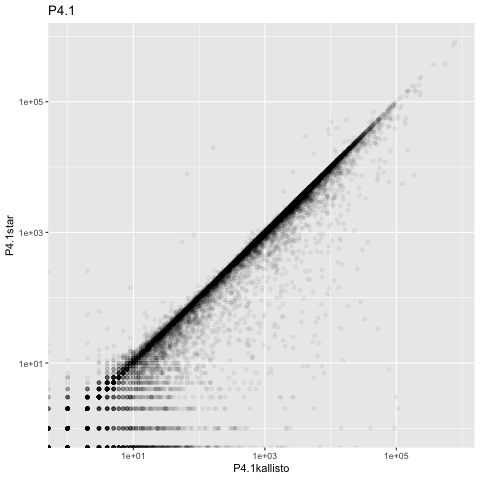

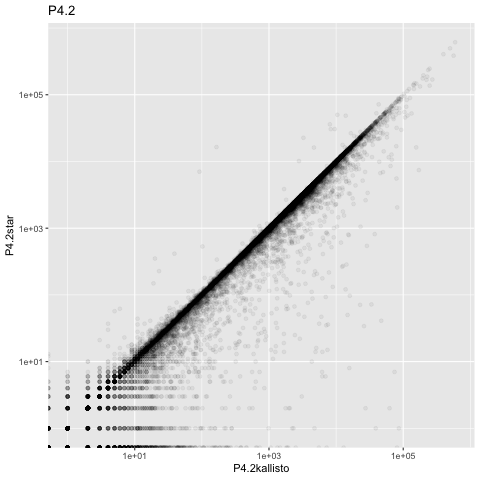

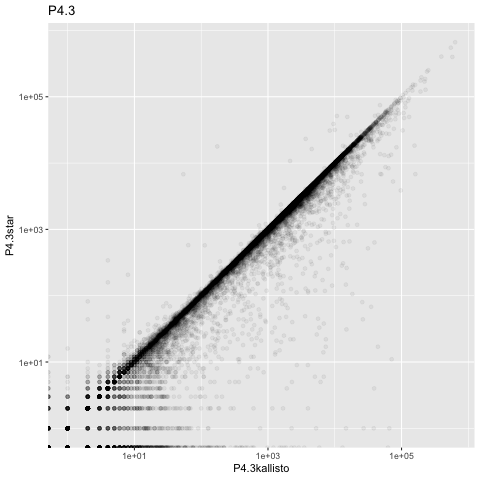

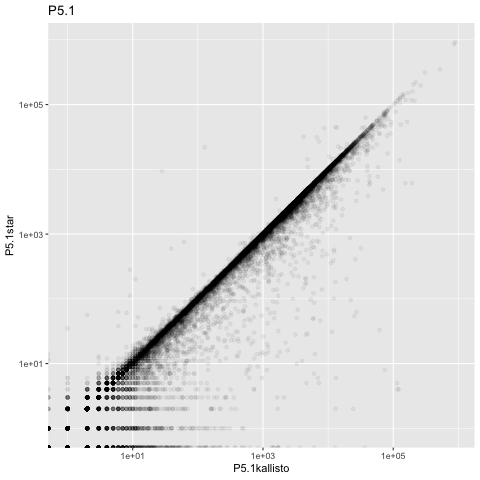

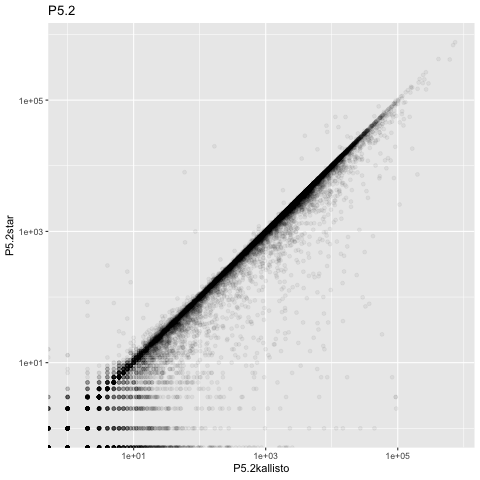

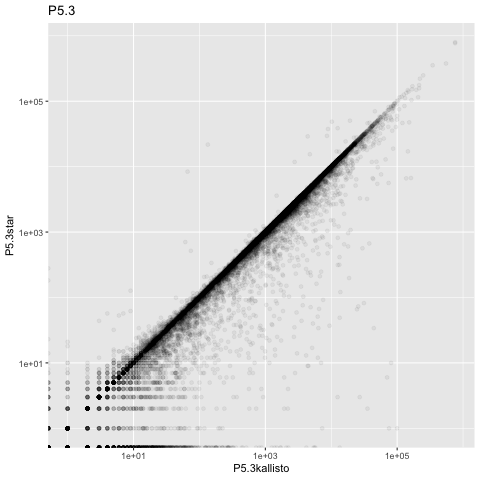

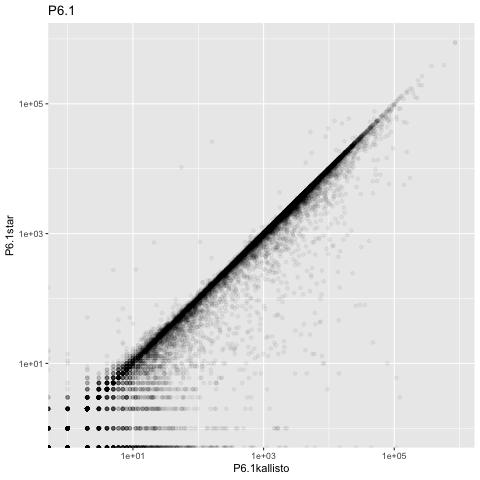

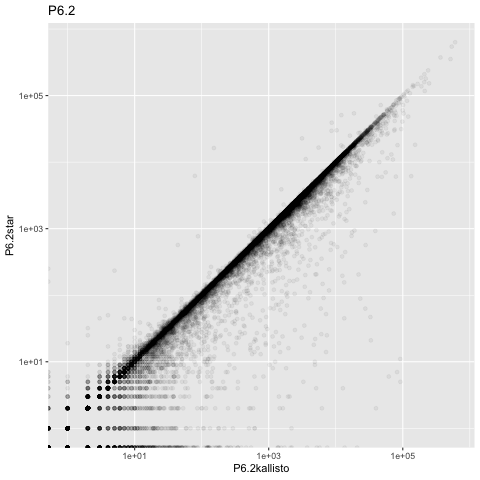

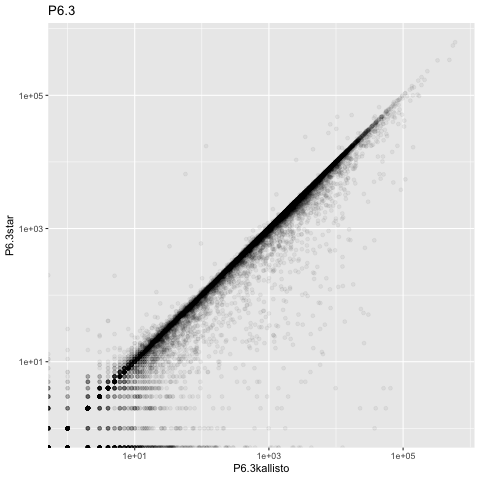

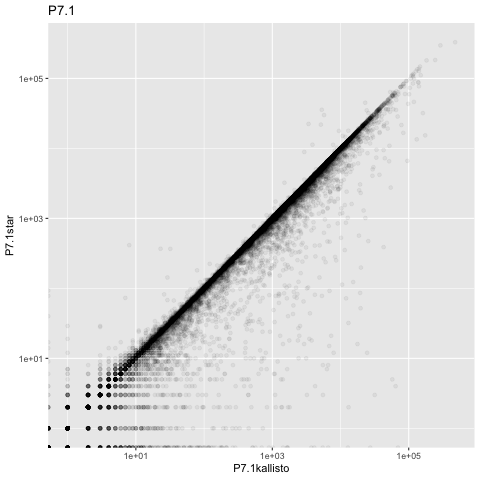

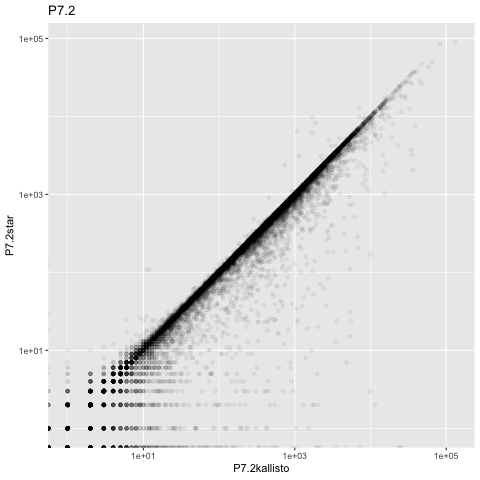

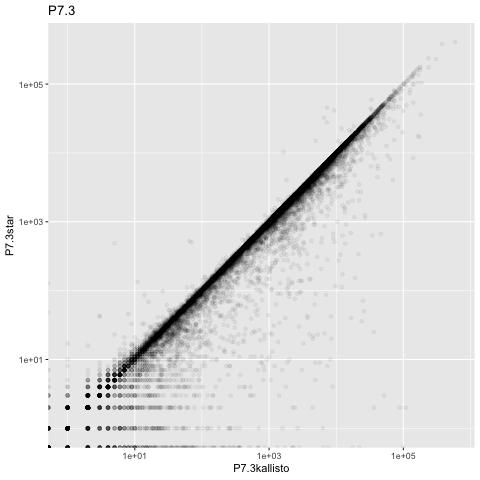

In [105]:
for sample in star.columns.unique():
    sample = sample.replace('-', '.')
    %R -i sample print(ggplot(merged, aes_string(x=paste0(sample, 'kallisto'), y=paste0(sample, 'star'))) + geom_point(alpha=0.05) + scale_x_log10() + scale_y_log10() + ggtitle(sample))

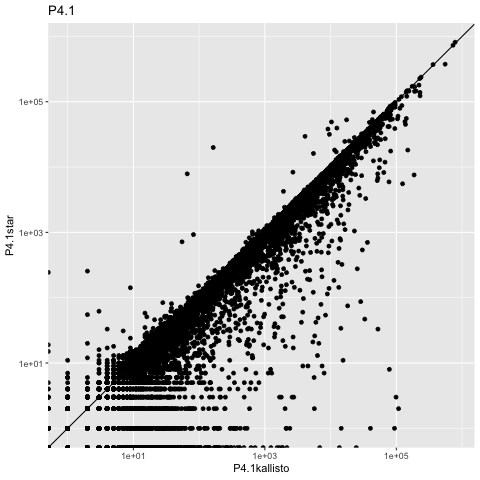

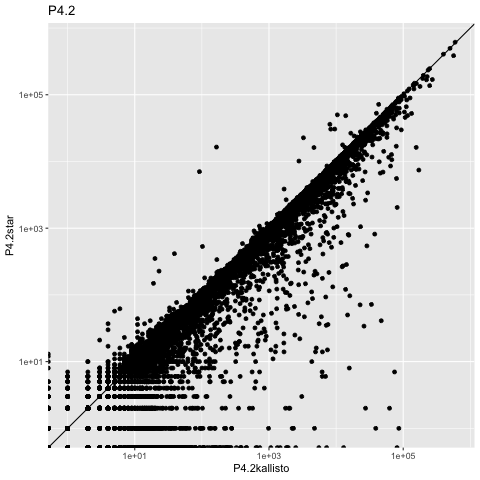

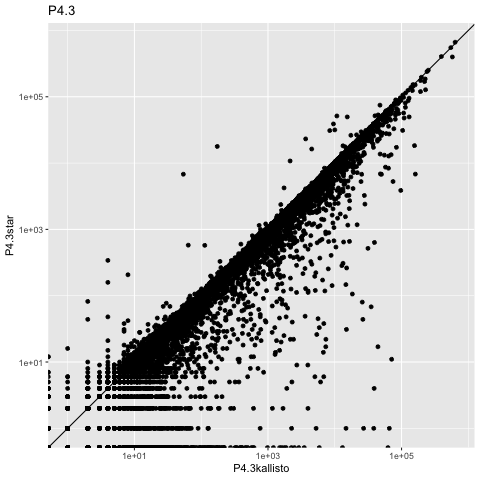

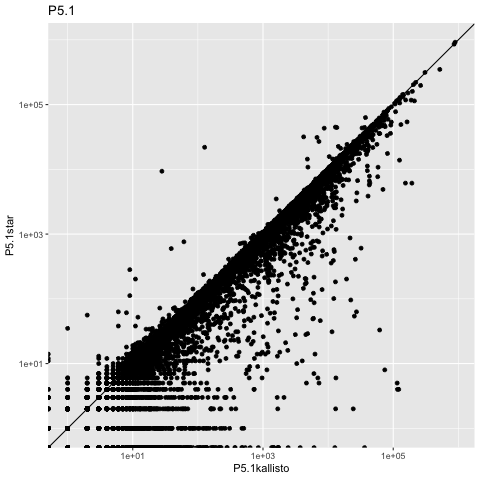

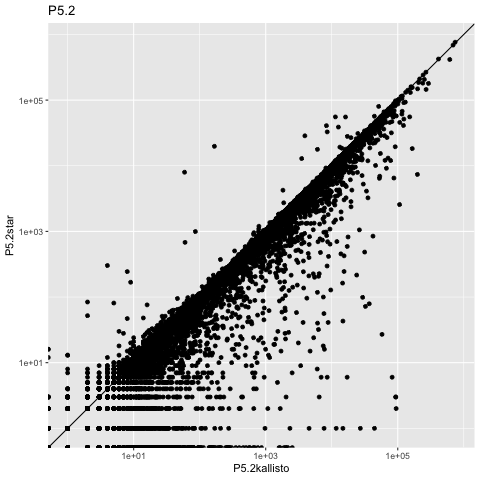

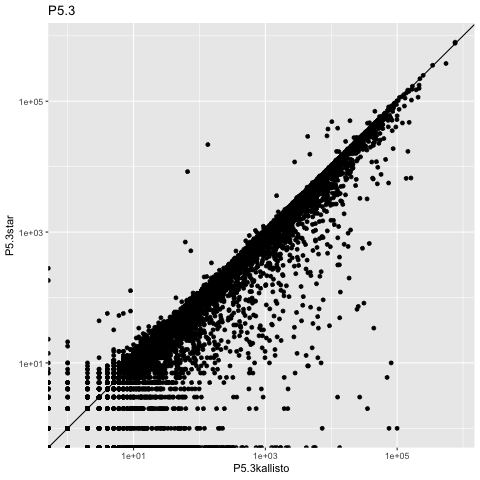

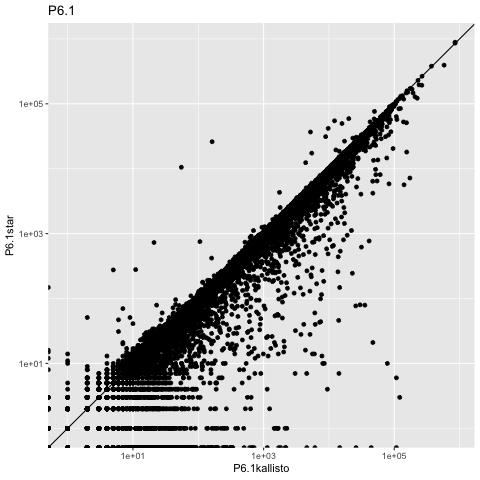

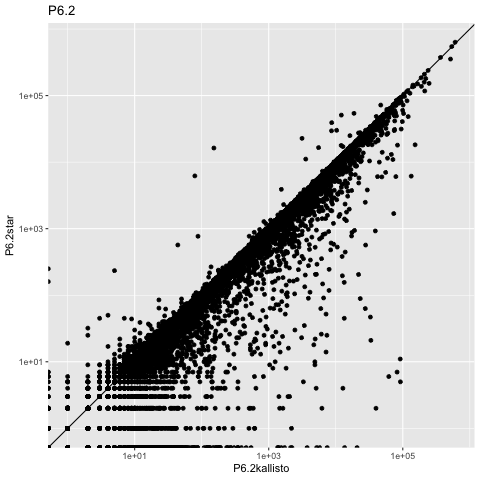

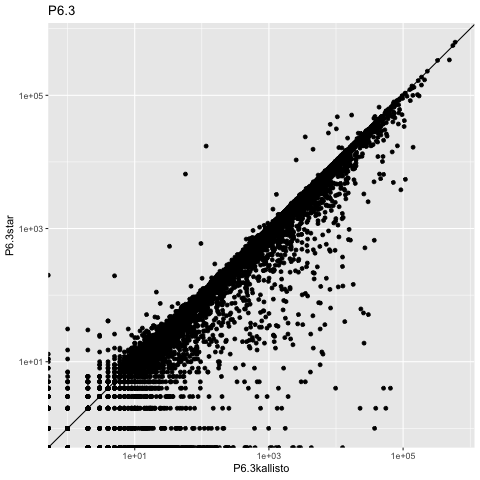

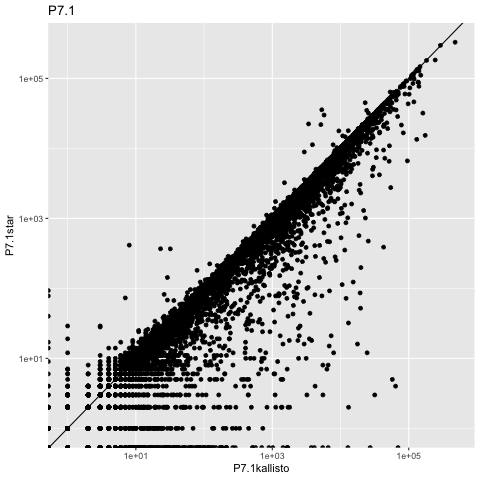

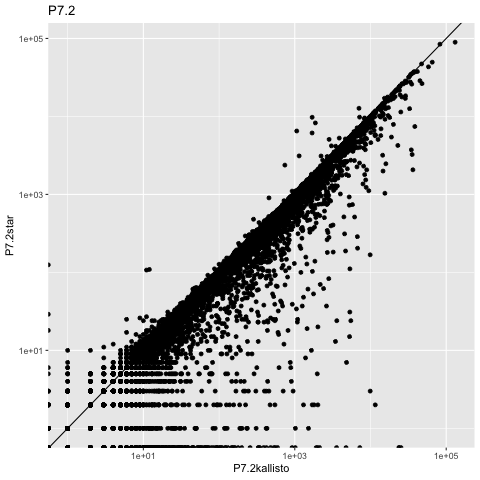

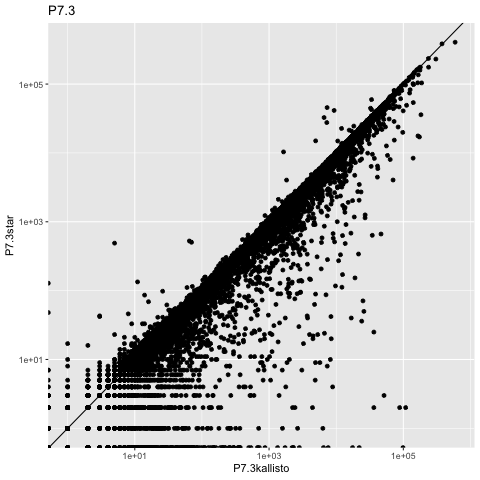

In [106]:
for sample in star.columns.unique():
    sample = sample.replace('-', '.')
    %R -i sample print(ggplot(merged, aes_string(x=paste0(sample, 'kallisto'), y=paste0(sample, 'star'))) + geom_point() + scale_x_log10() + scale_y_log10() + ggtitle(sample) + geom_abline(intercept=0, slope=1))